#Stage 1   
VIP CUP   
______
**SPA Group**  
Sajjad Jabbarzade   
Parham Soltani   
Amirtaha Aghasi
______   

##Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##Preparing Data   
Importing the violin.jpg into the Google VM Drive

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving violin.jpg to violin.jpg


##Task 2

###Loading the Original Image

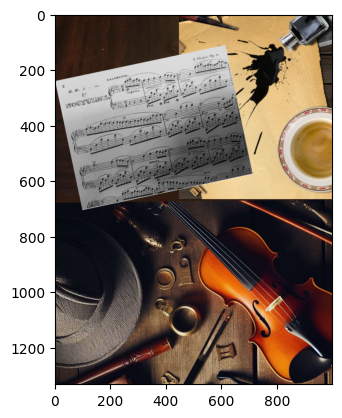

In [4]:
image = cv2.imread("violin.jpg",1)
new_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.show()

###Phase 1

True

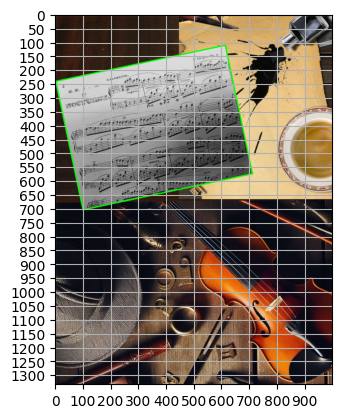

In [5]:
img = cv2.imread("violin.jpg",1)
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Define the coordinates of the rectangle - the numbers are calculated by h and w of coordinate
rect_points = np.array([[45, 645], [45, 172], [668, 172],[668, 645]])

# Calculate the center of the rectangle
center_x = np.mean(rect_points[:, 0])
center_y = np.mean(rect_points[:, 1])

# Define the rotation angle (in degrees)
angle_degrees = 12

rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle_degrees, scale=1)

rotated_rect_points = cv2.transform(np.array([rect_points]), rotation_matrix)[0]

for i in range(4):
    cv2.line(image, tuple(rotated_rect_points[i]), tuple(rotated_rect_points[(i + 1) % 4]), (0, 255, 0), 3)
plt.imshow(image)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
plt.xticks(np.arange(0, 1600, 100))
plt.yticks(np.arange(0, 1600, 50))
plt.imshow(image)
plt.grid(True)

cv2.imwrite("Output Image for Phase 1.jpg", image[:,:,::-1])

### Phase 2





Step of Original Image 12 Degrees Rotation

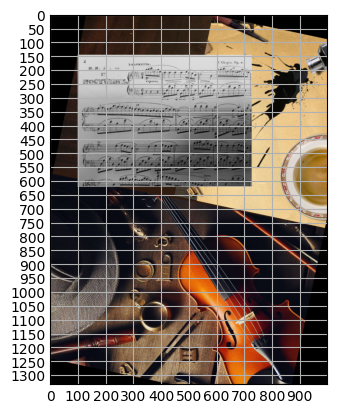

In [6]:
angle_degrees = -12
rows, cols, _ = new_img.shape
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle_degrees, scale=1)
new_img = cv2.warpAffine(new_img, rotation_matrix, (cols, rows))
plt.xticks(np.arange(0, 1600, 100))
plt.yticks(np.arange(0, 1600, 50))
plt.imshow(new_img)
plt.grid(True)
plt.show()

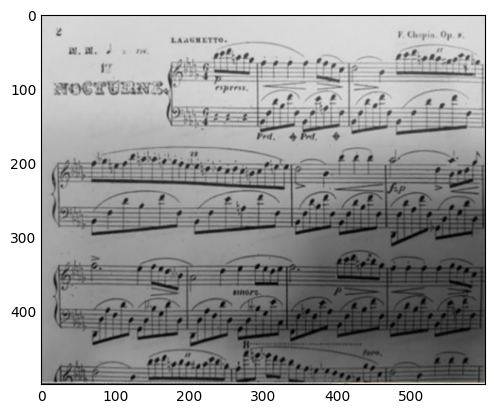

True

In [7]:
# Points of the music sheet in the rotated image - calculation of axes of note music sheet by previous step
pts1 = np.float32([[100, 148], [725, 148], [100, 623], [725, 623]])

# Dimensions for the output warped music sheet
width, height = 600, 500
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Compute perspective transform matrix
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Apply perspective warp to extract music sheet
warped_music_sheet = cv2.warpPerspective(new_img, matrix, (width, height))

plt.imshow(warped_music_sheet)
#plt.axis('off')
plt.show()

cv2.imwrite("Output Image for Phase 2.jpg", warped_music_sheet)

###Phase 3

In [8]:
warped_music_sheet_gray = cv2.cvtColor(warped_music_sheet, cv2.COLOR_BGR2GRAY)

Apply adaptive thresholding to make notes distinct from background
we found 7 by Try and Test   
Actually we have tried many threshold metods but Adaptive Thershold was the most effective one

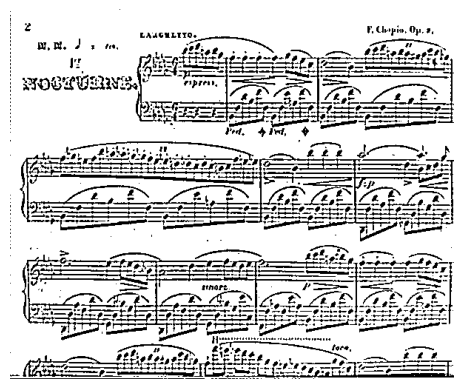

True

In [9]:
thresholded = cv2.adaptiveThreshold(warped_music_sheet_gray, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY,11,7 )

plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

cv2.imwrite("Output Image for Phase 3.jpg", thresholded)